Identify factors influencing user movie rentals.

These factors can be broadly categorized into user-related, movie-related, and external factors:


In [97]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.metrics import mean_squared_error
import json

User:
    
    - Preferences in genres, actors, and directors influence movie choice.

    - Past Viewing History and demographics (age, gender, location, etc) can influence preferences.
    
    - Social Influence: Recommendations from friends, family, community social media.


In [98]:
MOVIE_DATA_PATH = "../data/external/movie/"
MOVIES = MOVIE_DATA_PATH + "movies.csv"
RATINGS = MOVIE_DATA_PATH + "ratings.csv"
TAGS =  MOVIE_DATA_PATH + "tags.csv"
LINKS = MOVIE_DATA_PATH + "links.csv"

In [99]:
movies_df = pd.read_csv(MOVIES, header=0)
ratings_df = pd.read_csv(RATINGS, header=0)
tags_df = pd.read_csv(TAGS, header=0)
links_df = pd.read_csv(LINKS, header=0)

#### Analysis genres and user ratings


In [100]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [102]:
genres_data = pd.merge(ratings_df, movies_df, on=['movieId'], how='inner')

In [103]:
genres_data['genres'] = genres_data['genres'].astype(str)
genres_data['genres'] = genres_data['genres'].str.split('|')
exploded_genres = genres_data.explode('genres')



In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

#### It shows that four genres: crime, mystery, drama, war, and action have general higher ratings

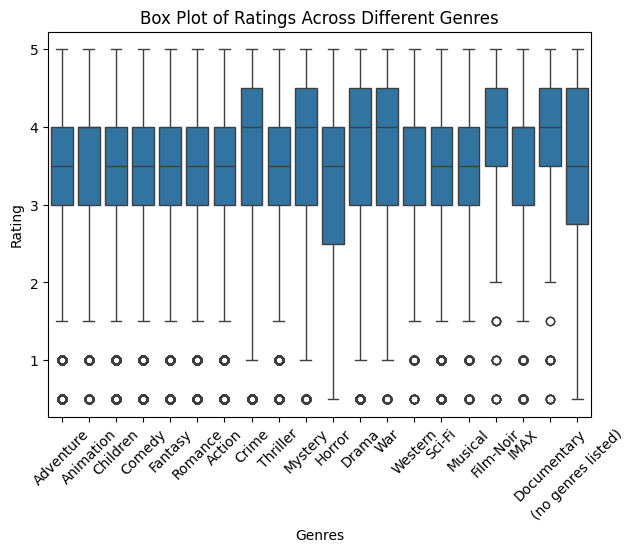

In [107]:
# Creating a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(data=exploded_genres, x='genres', y='rating')
plt.xticks(rotation=45)
plt.title('Box Plot of Ratings Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.show()

In [108]:
# find out active users in ratings
top10_active_users = exploded_genres['userId'].value_counts().sort_values(ascending=False)[:10].index

In [110]:
user_genre_mean_ratings = exploded_genres.groupby(['userId', 'genres']).agg({'rating': 'mean'}).reset_index()
user_genre_mean_ratings.set_index("userId", inplace=True)

#### Case studies show user 288 likes Film-Nior

In [120]:
# Case studies show user 288 likes Film-Nior
user_288 = user_genre_mean_ratings.loc[288]

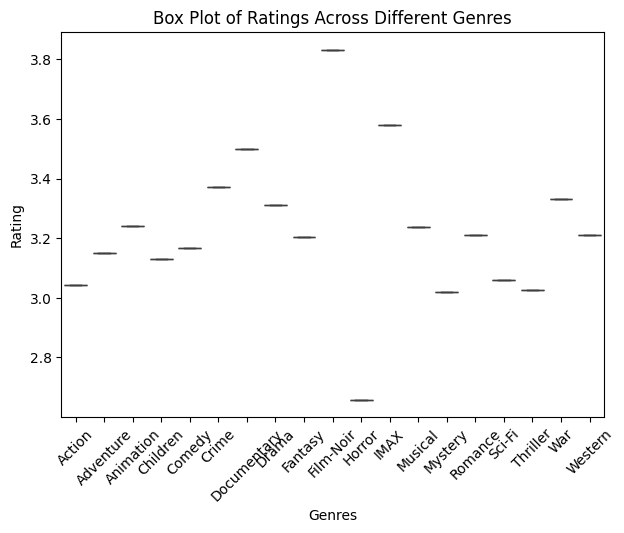

In [121]:
# Creating a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(data=user_288, x='genres', y='rating')
plt.xticks(rotation=45)
plt.title('Box Plot of Ratings Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.show()

#### The dataset does not have user related demographic information: locations, education, etc.
#### It has user tags to movies. Here is ananalysis of tags with user ratings

In [5]:
merged_data = pd.merge(ratings_df, tags_df, on=['userId', 'movieId'])

In [6]:
merged_data.drop(columns=['timestamp_x', 'timestamp_y'], inplace=True)

In [7]:
# find out active users that tag and rating the movies
top10_active_users = merged_data['userId'].value_counts().sort_values(ascending=False)[:10].index

In [8]:
merged_data.set_index("userId", inplace=True)

In [9]:
top10_active_merged_data = merged_data.loc[top10_active_users]

#### The graph investigate tags and movie choice for the users
#### User ratings varies from users to users, some usrs have large variability in ratings; whereas others users can rating movies always 5

userId
62     Axes(0.125,0.11;0.775x0.77)
125    Axes(0.125,0.11;0.775x0.77)
318    Axes(0.125,0.11;0.775x0.77)
357    Axes(0.125,0.11;0.775x0.77)
424    Axes(0.125,0.11;0.775x0.77)
474    Axes(0.125,0.11;0.775x0.77)
477    Axes(0.125,0.11;0.775x0.77)
537    Axes(0.125,0.11;0.775x0.77)
567    Axes(0.125,0.11;0.775x0.77)
599    Axes(0.125,0.11;0.775x0.77)
dtype: object

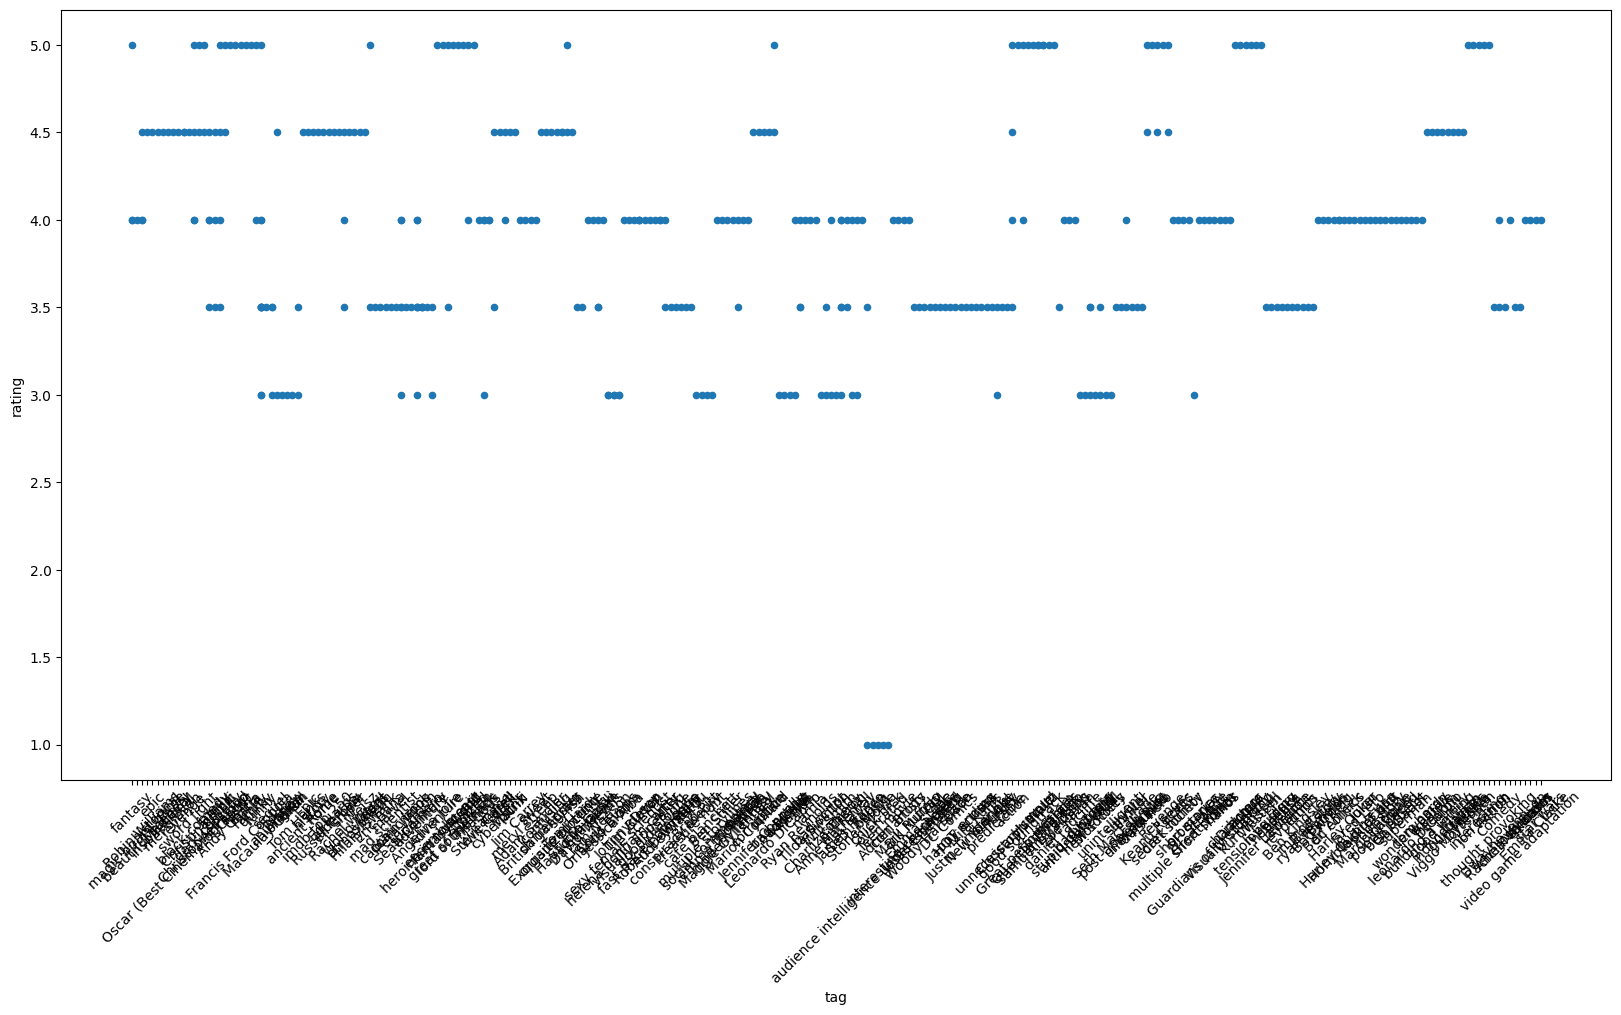

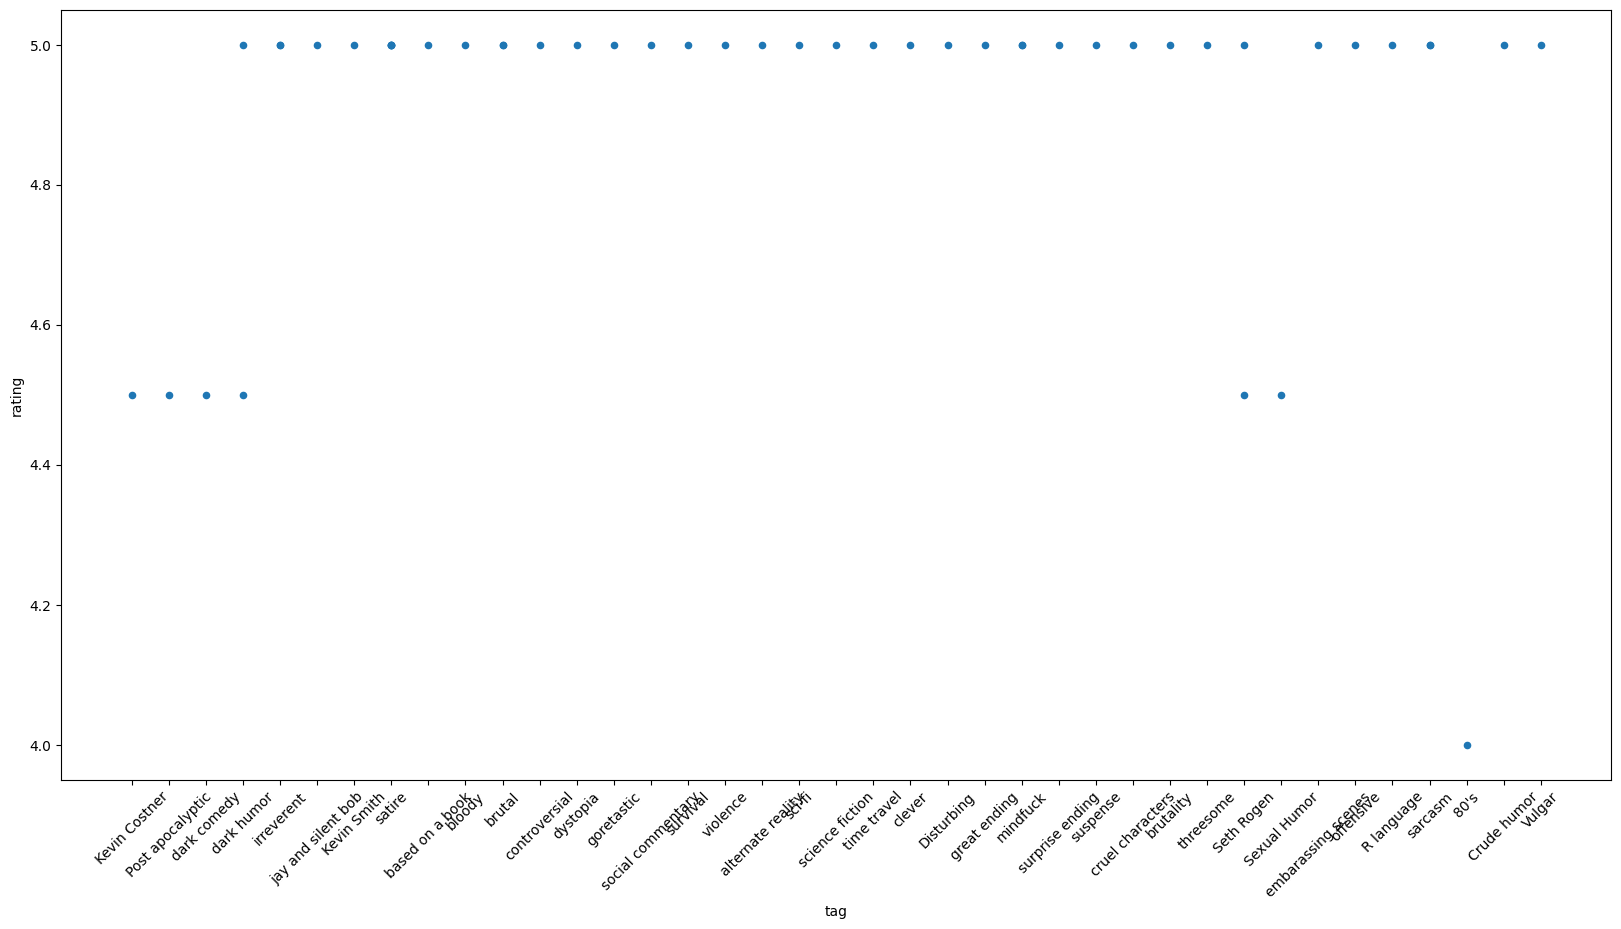

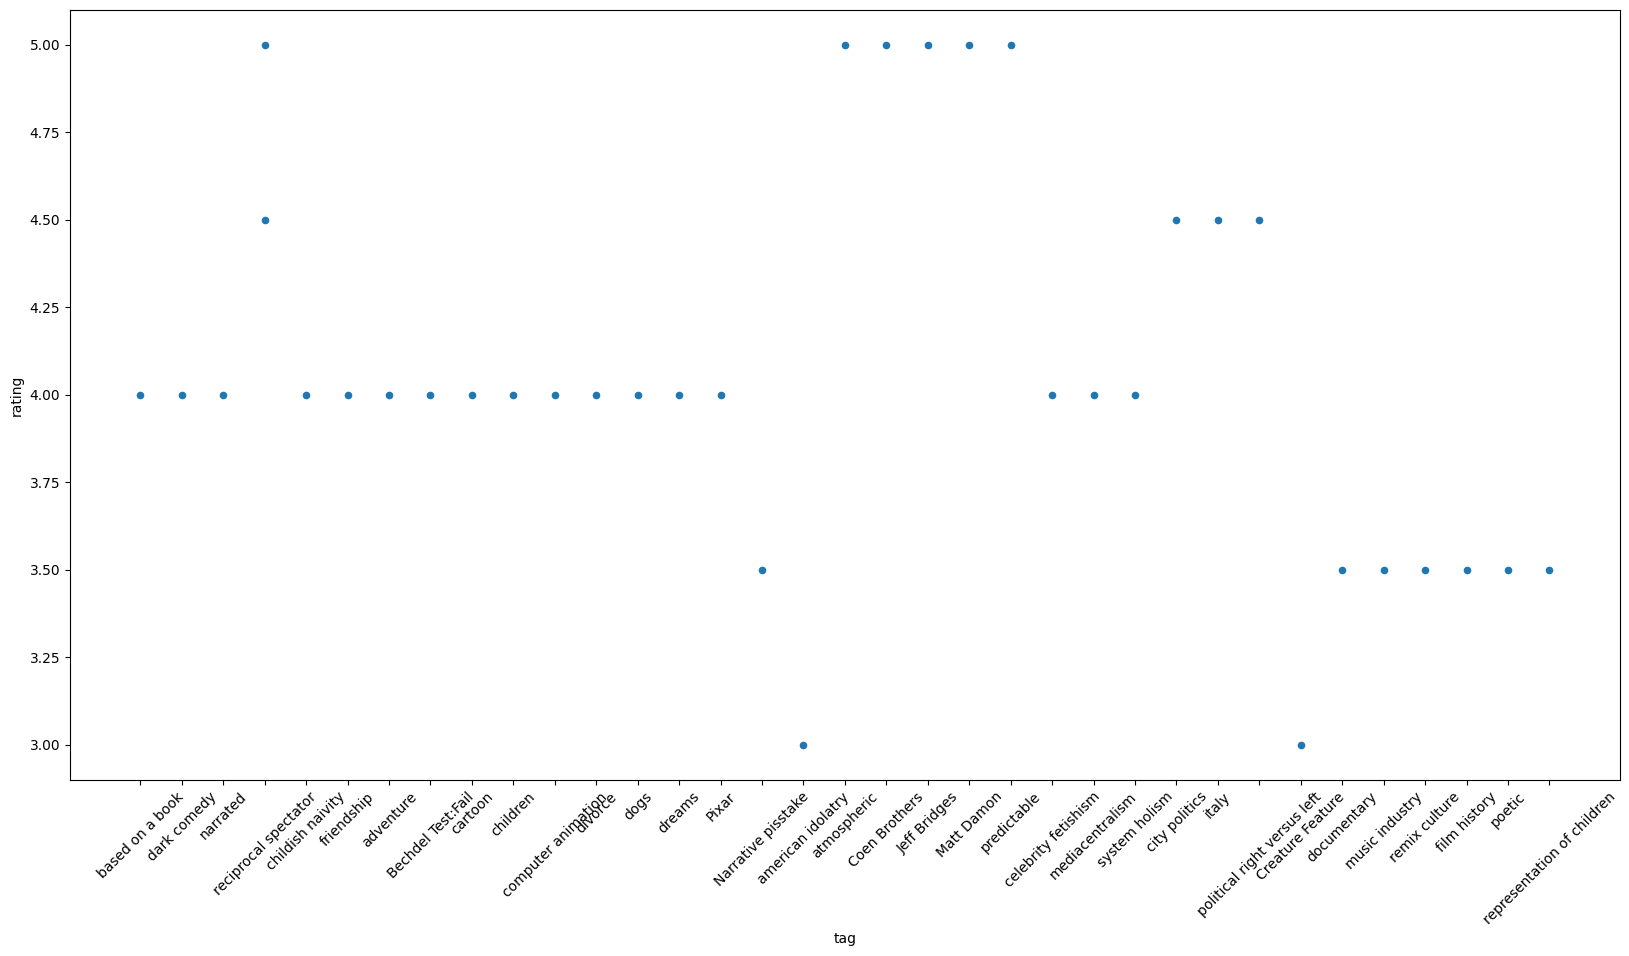

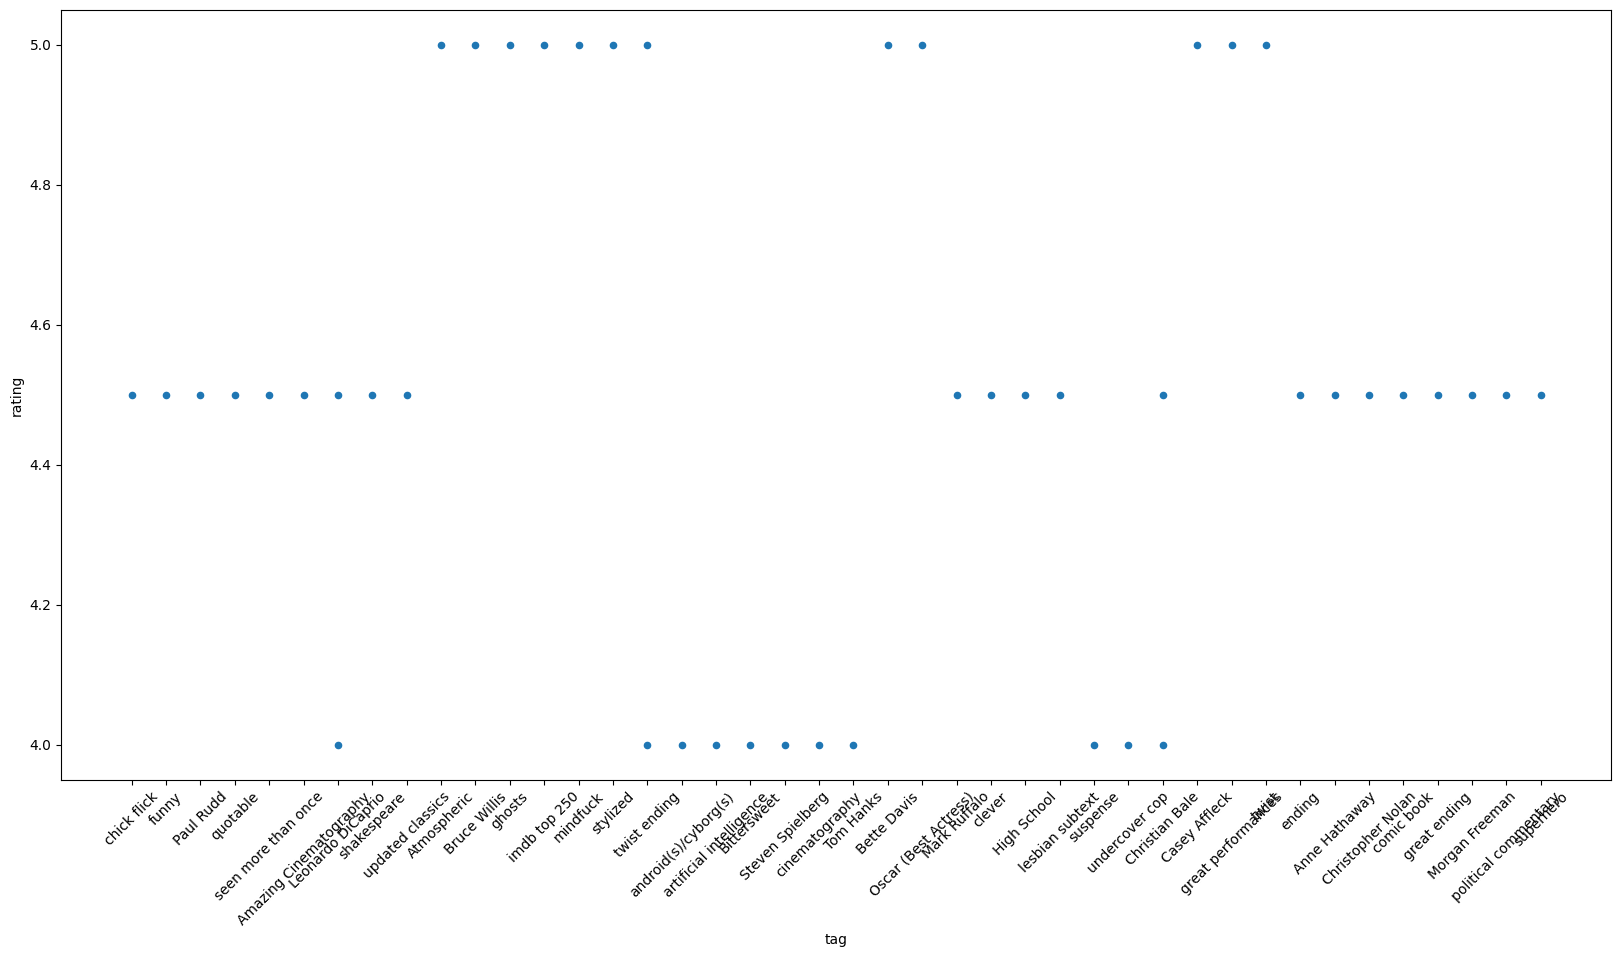

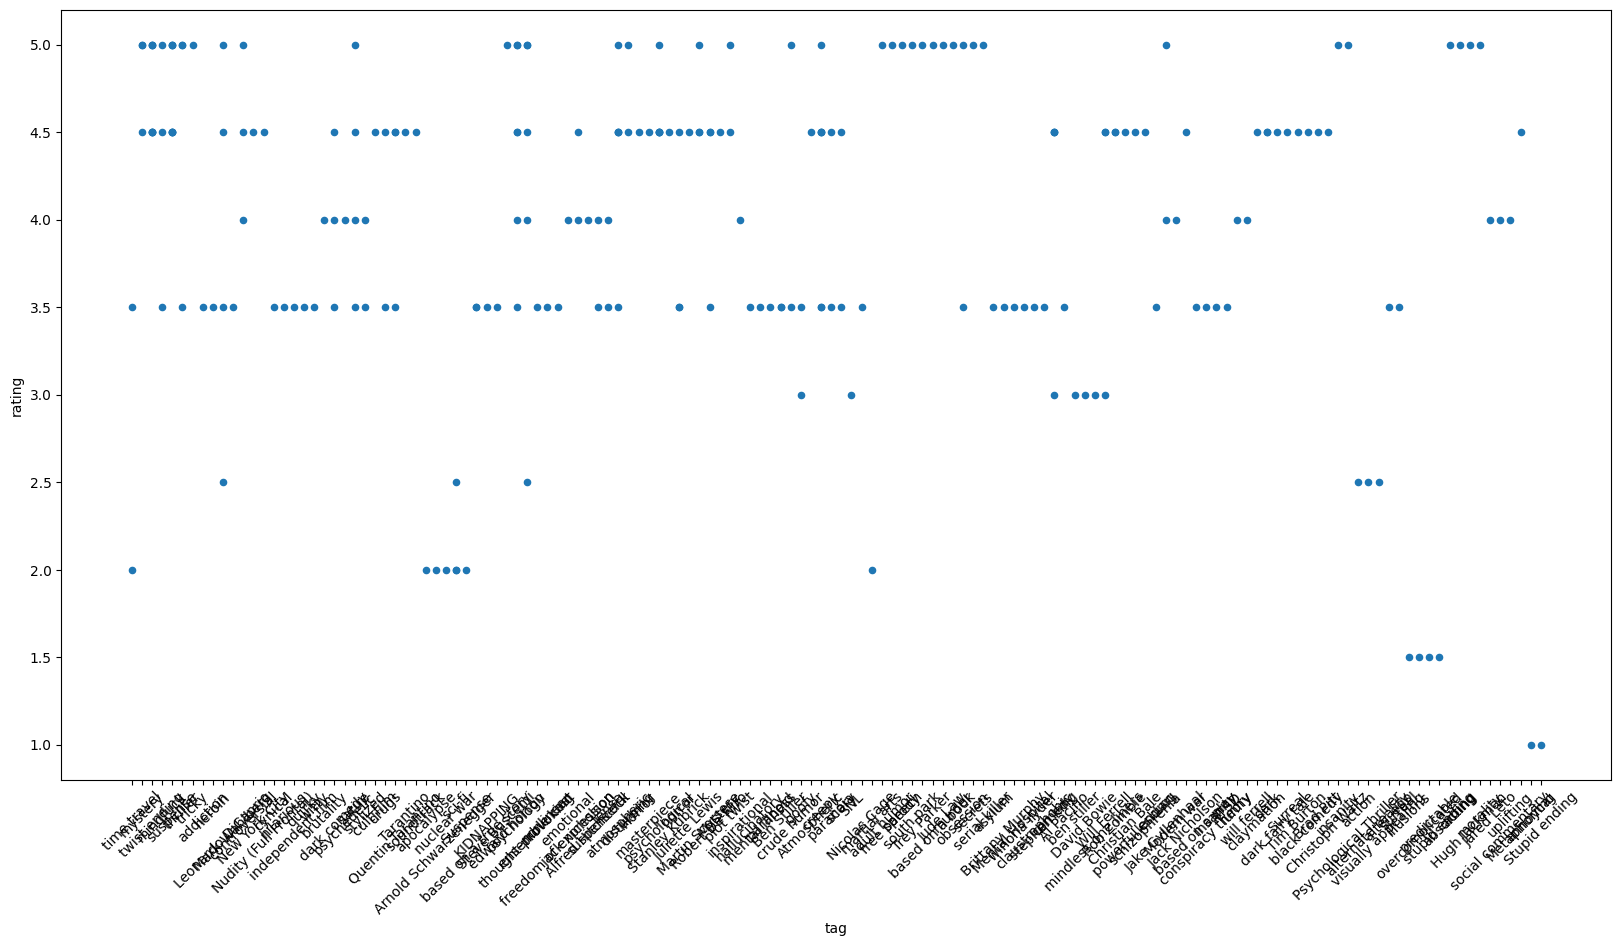

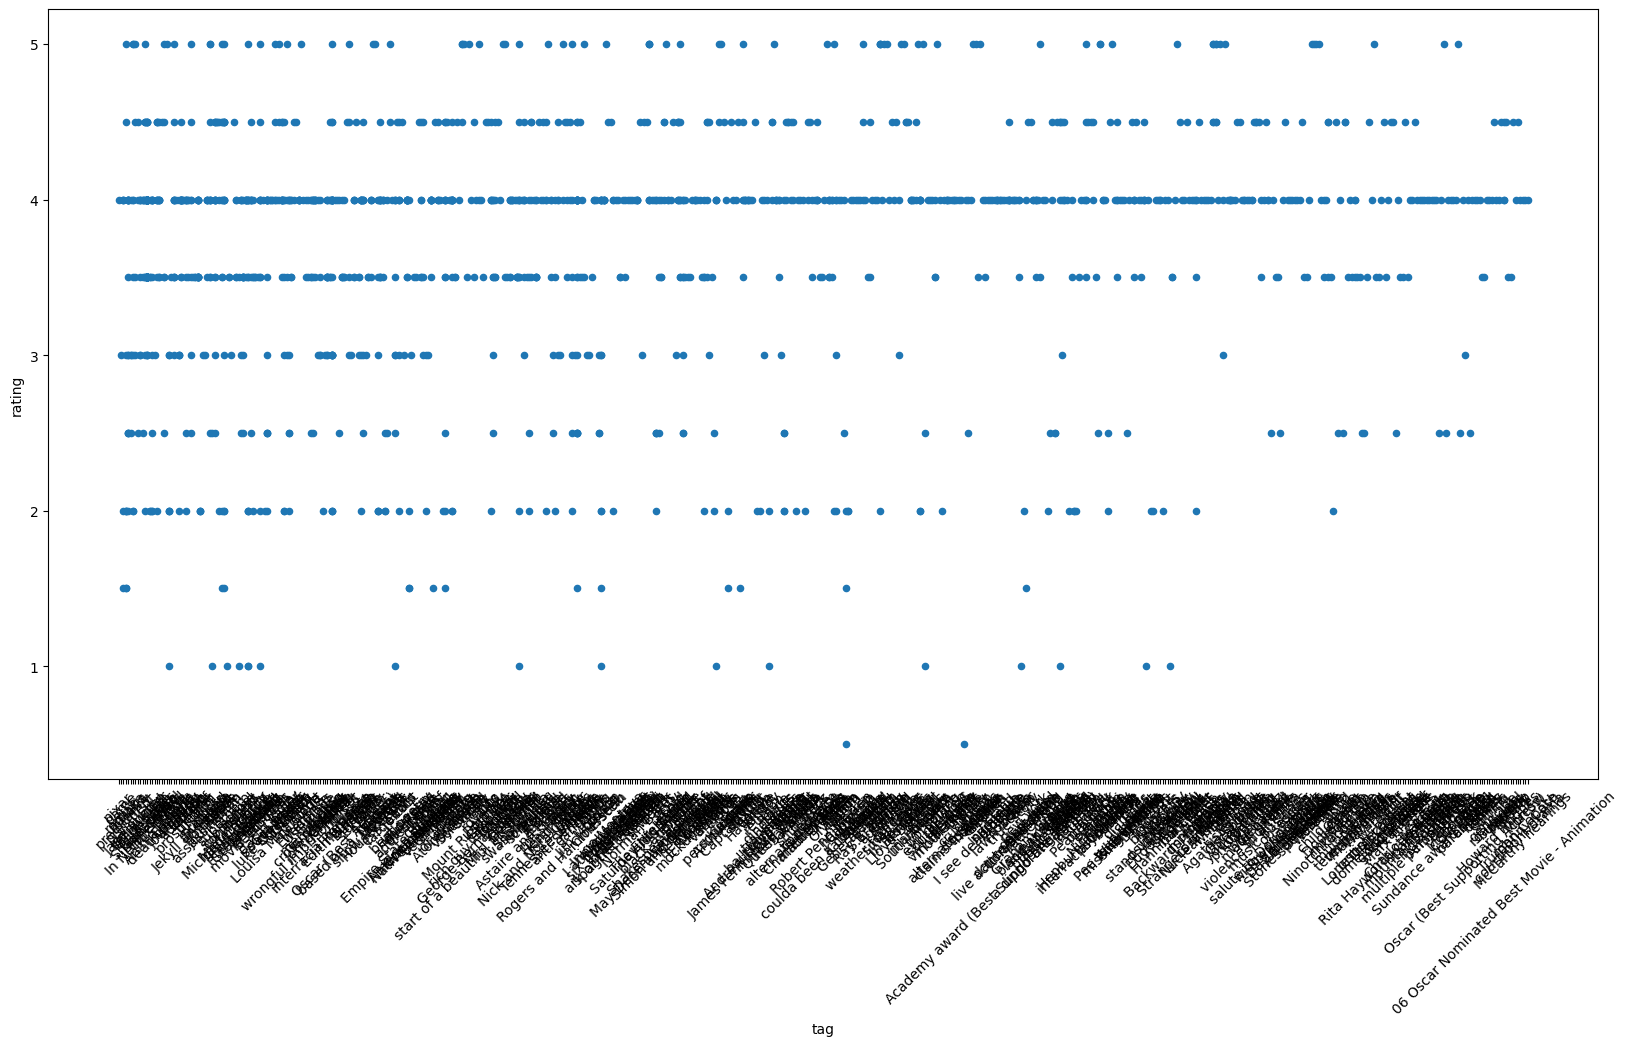

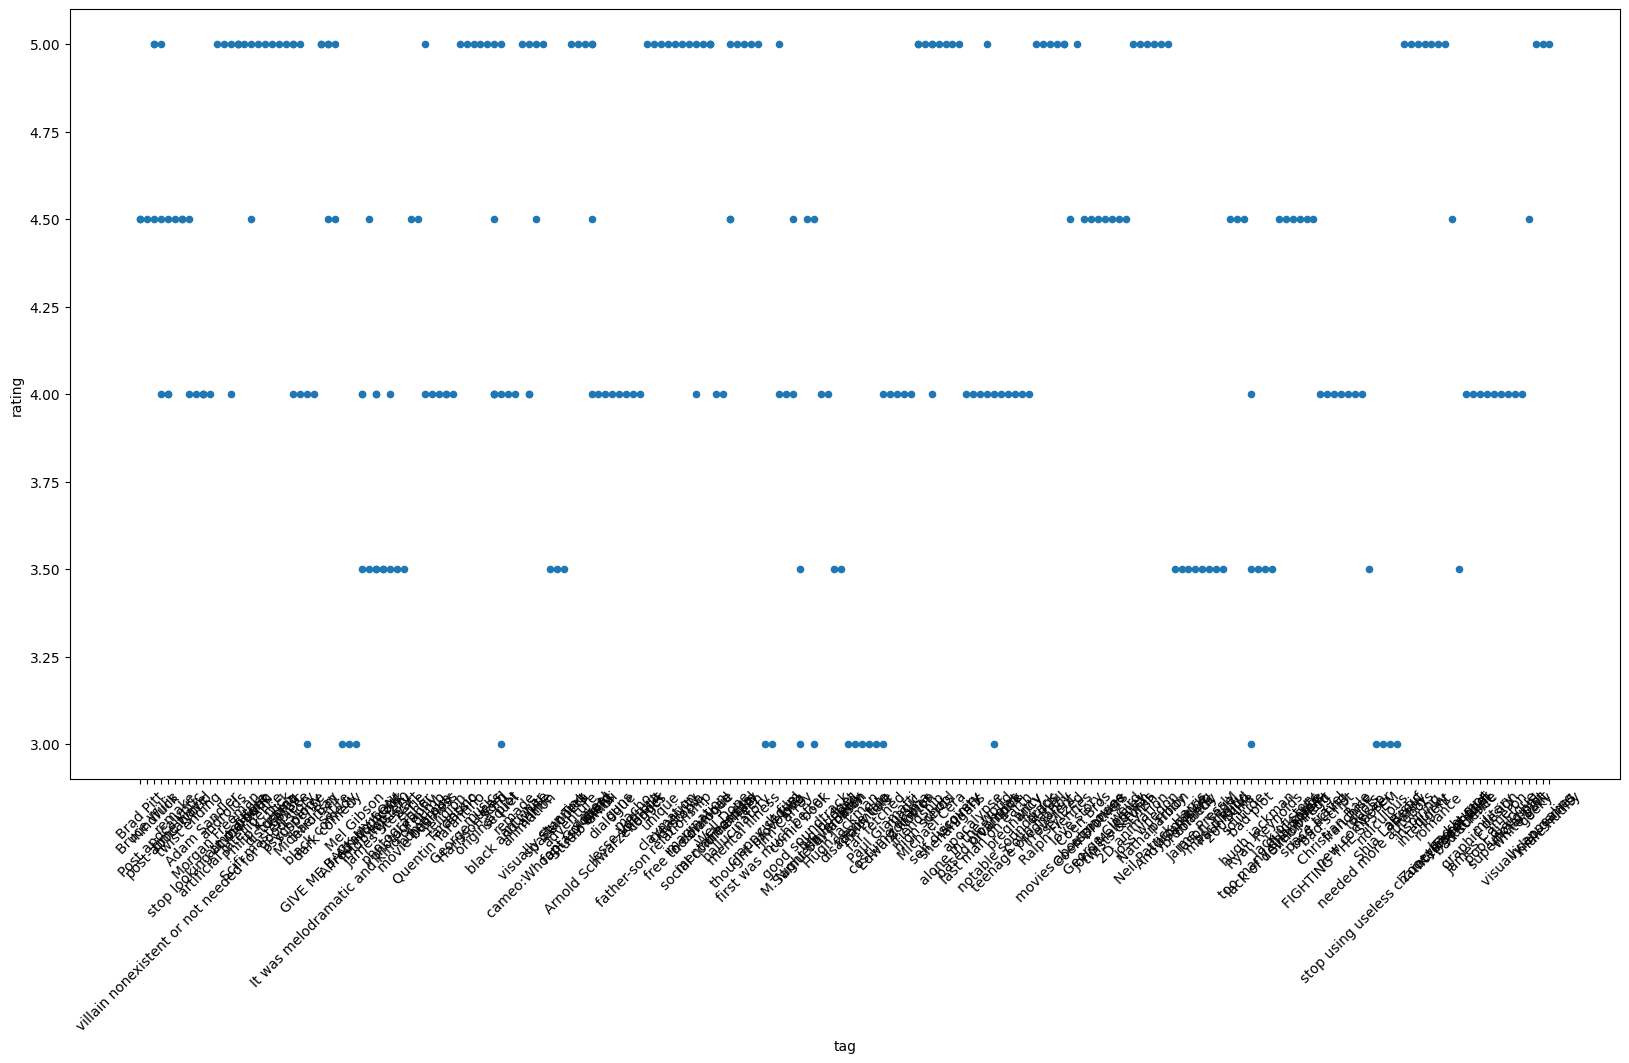

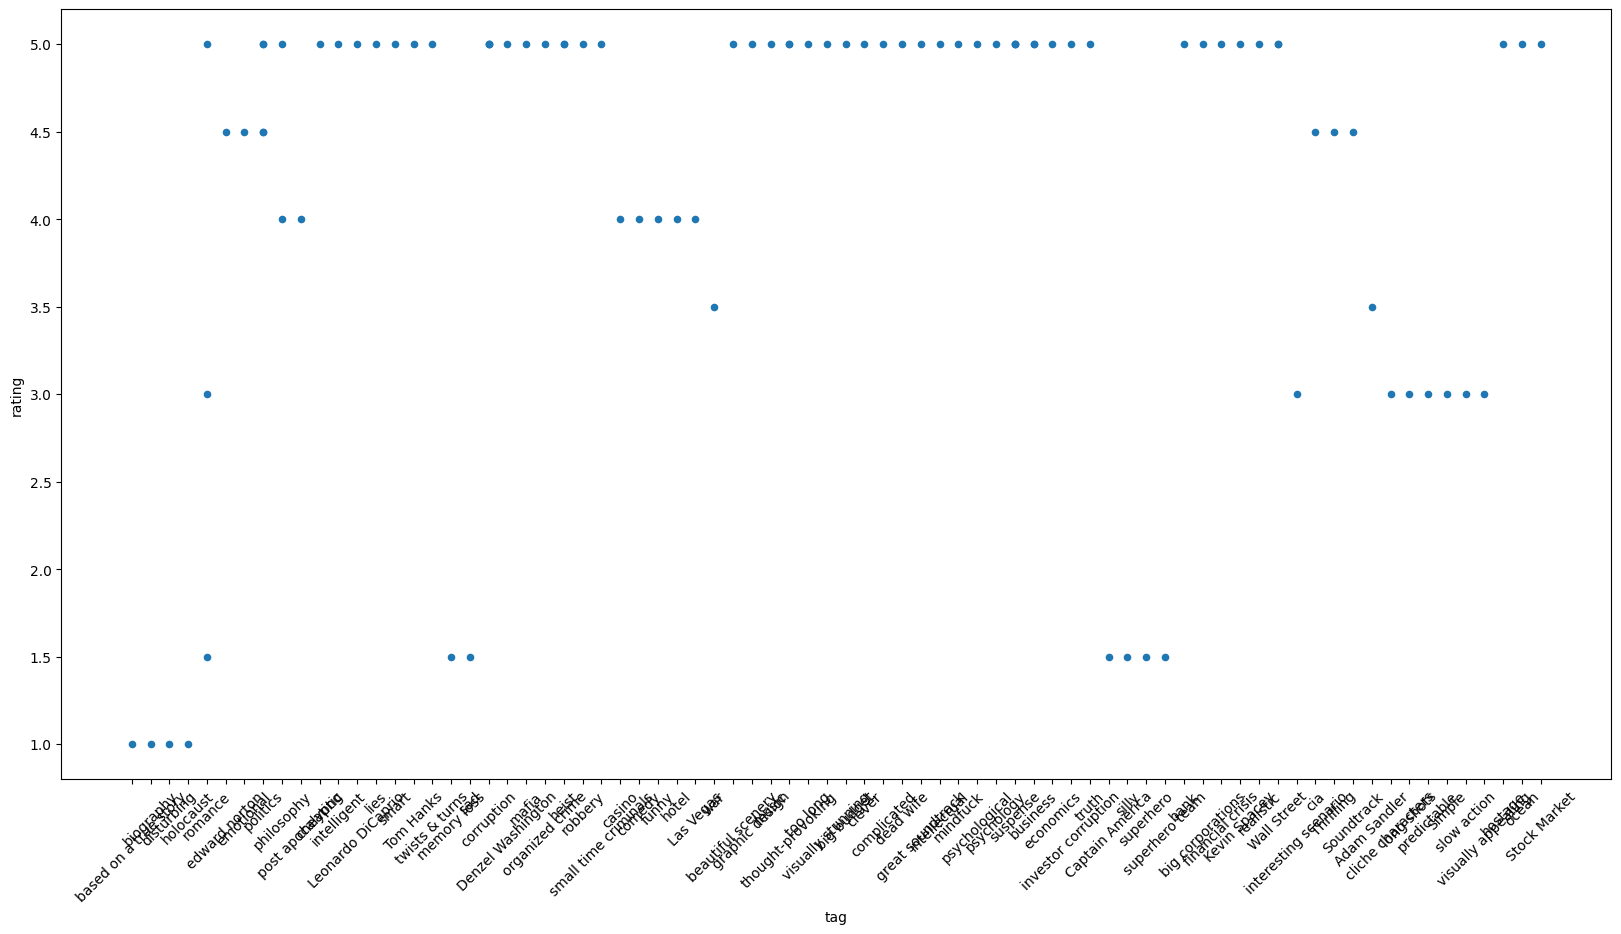

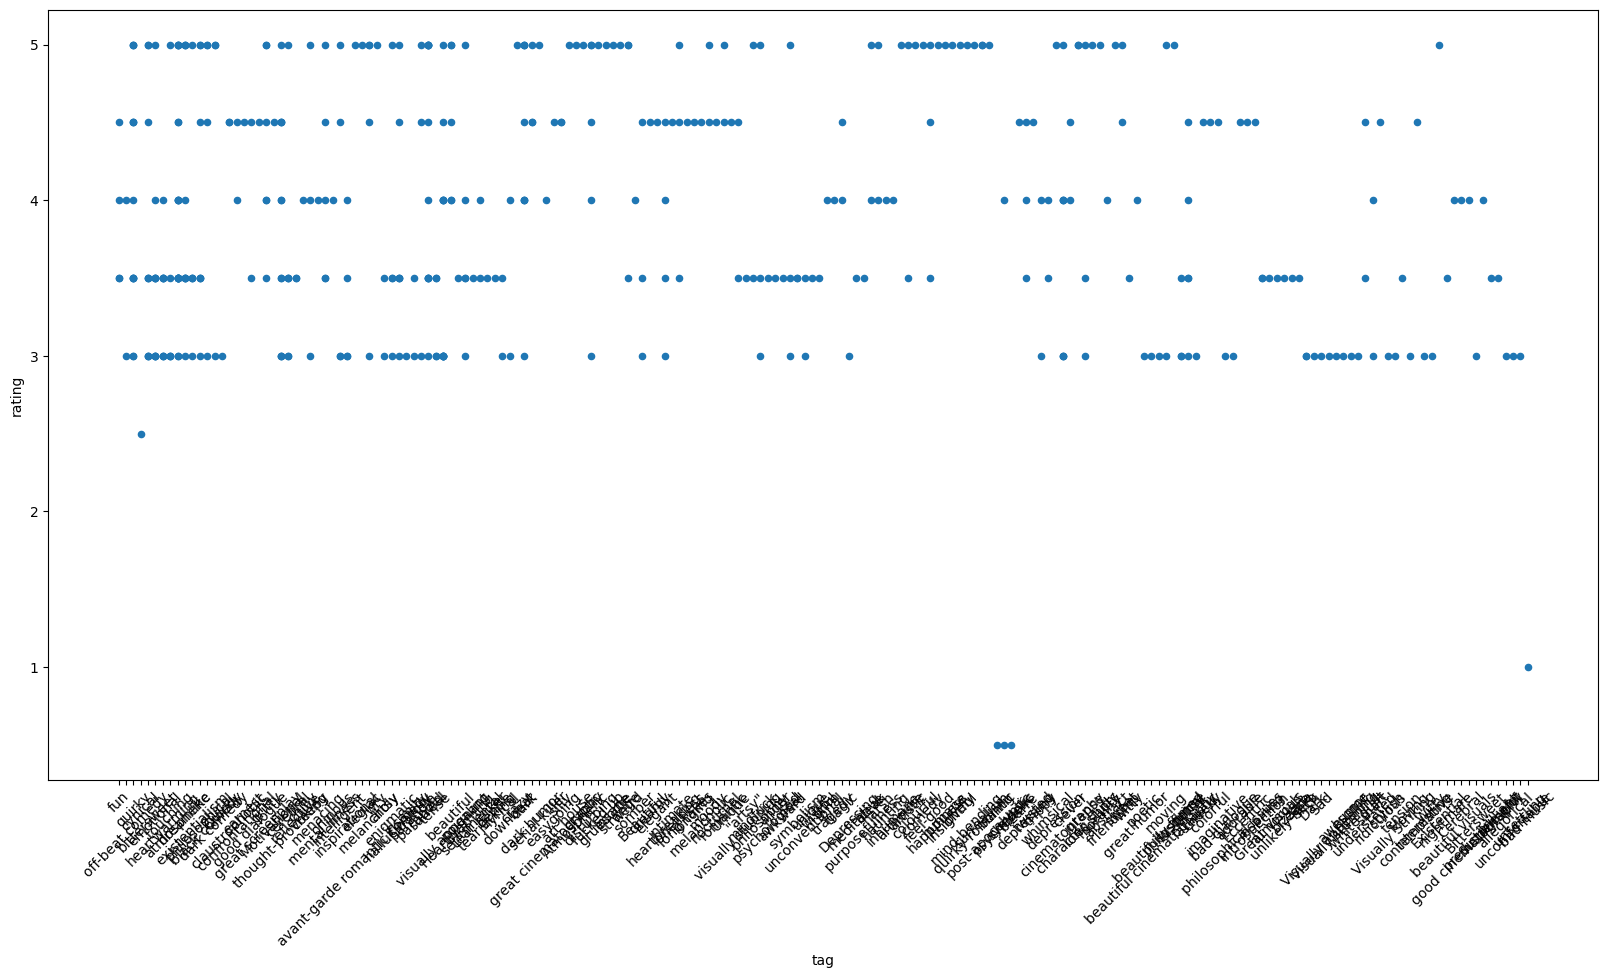

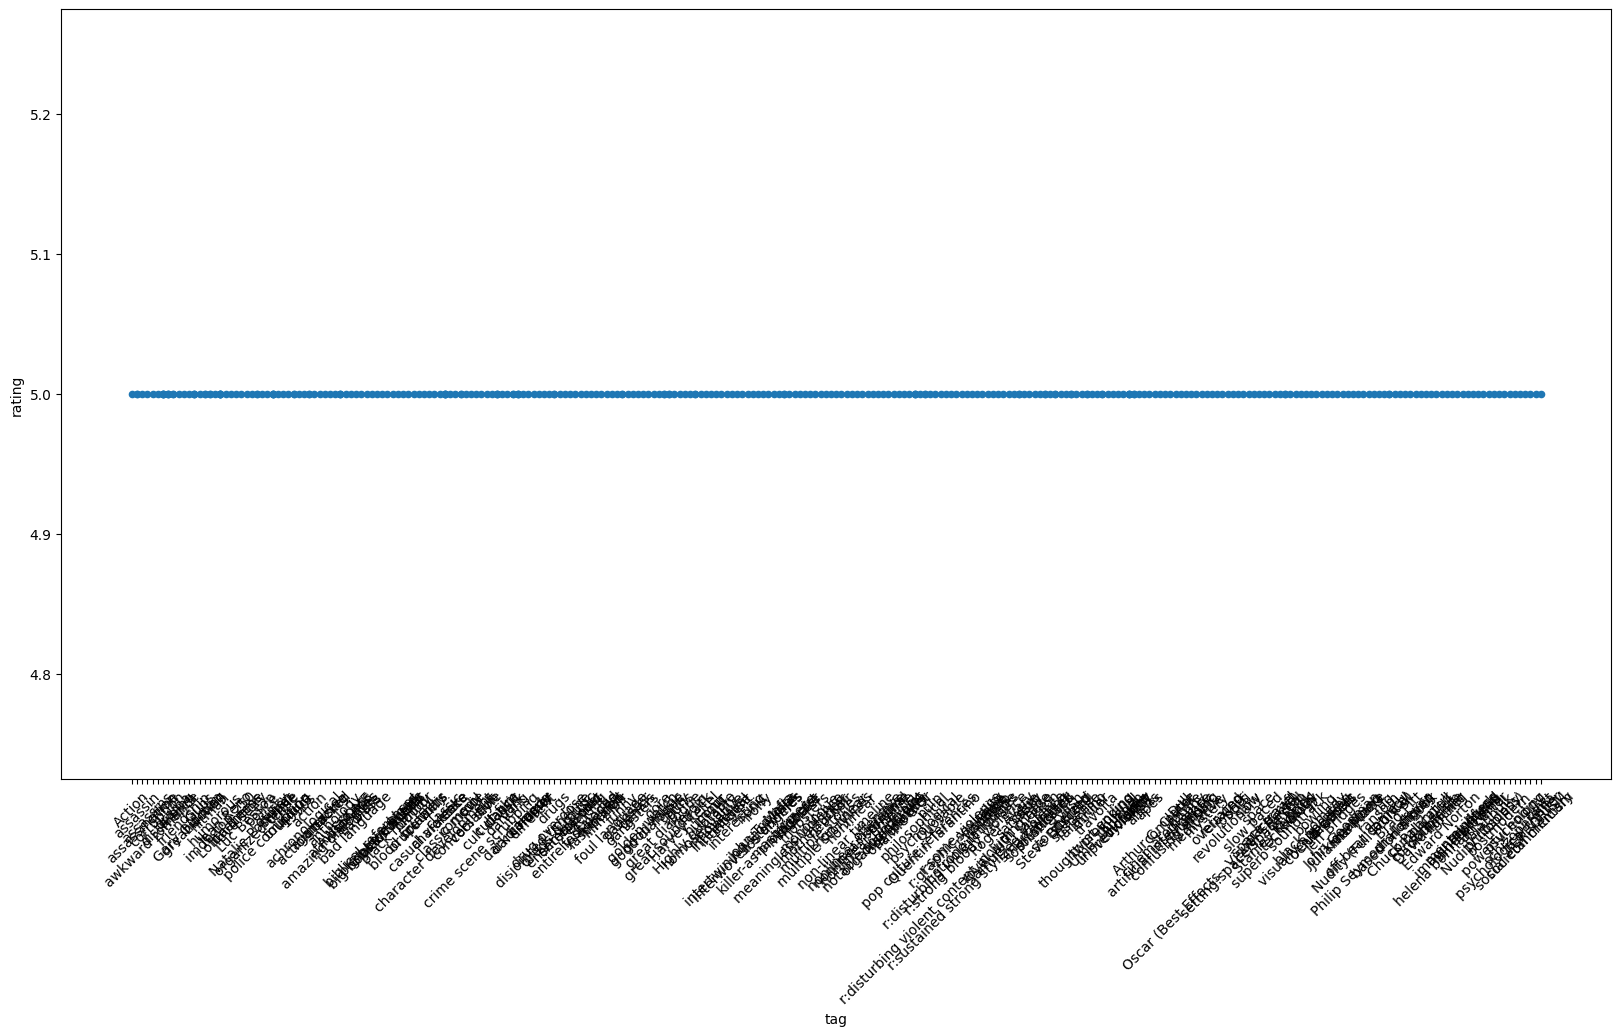

In [10]:


top10_active_merged_data.groupby('userId')[['rating','tag']].plot.scatter(x='tag', y='rating', rot=45, figsize=(20,10), fontsize=10)

Movie Factors:

- Ratings and reviews: over all ratings on movie databases, critic reviews, and user reviews.

- Marketing and Promotion: Trailers, posters, advertising campaigns, and media buzz.

- Price and Rental Terms: Cost of rental and terms like rental duration

In [11]:
merged_data = pd.merge(ratings_df, links_df, on=['movieId'], how="inner")

In [12]:
TMDB  = MOVIE_DATA_PATH + "tmdb/"

In [13]:
def extract_popularity(tmdbId):
    try:
        tmdbId_file = TMDB + str(int(tmdbId)) + ".json"
        with open(tmdbId_file) as json_file:
            # Load the JSON data into a Python dictionary
            data = json.load(json_file)
            popularity = data["popularity"]
            return popularity
    except:
        return -1

In [14]:
merged_data["popularity"] = merged_data["tmdbId"].apply(extract_popularity)

In [15]:
merged_data = merged_data.replace(-1, np.nan)

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scatter Plot between Popularity and Rating')

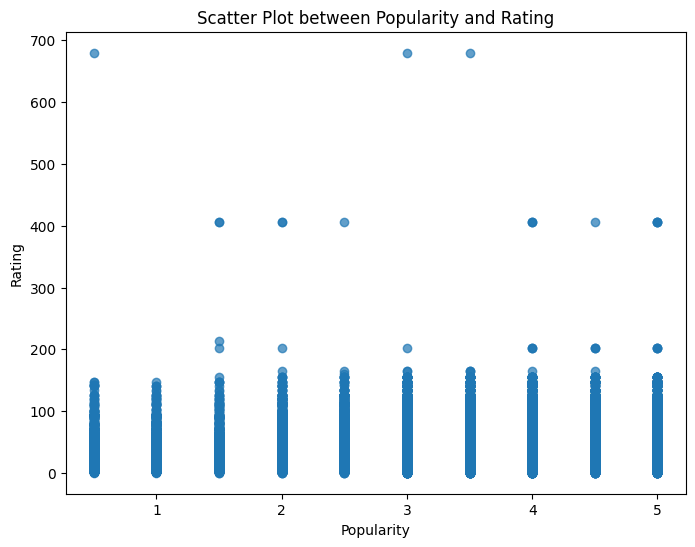

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['rating'], merged_data['popularity'], alpha=0.7)  # alpha controls point transparency

# Add labels and a title
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Scatter Plot between Popularity and Rating')

In [18]:
merged_data = merged_data[merged_data['popularity'] <= 200]

Text(0.5, 1.0, 'Scatter Plot between Popularity and Rating')

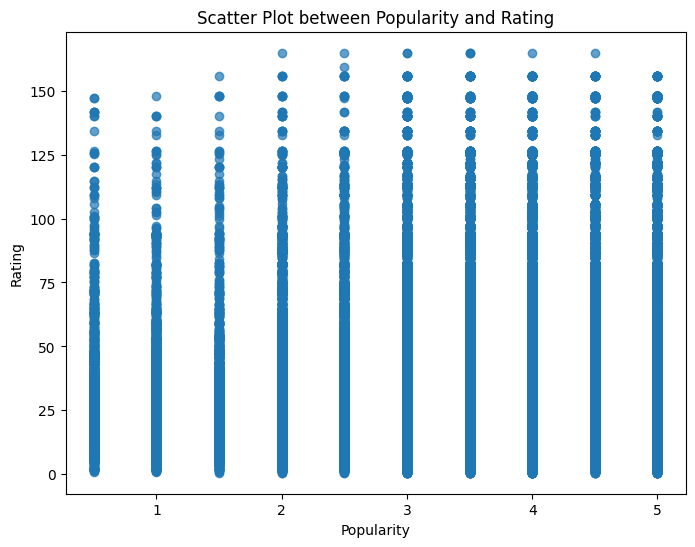

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['rating'], merged_data['popularity'], alpha=0.7)  # alpha controls point transparency

# Add labels and a title
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Scatter Plot between Popularity and Rating')

In [20]:
correlation = merged_data['rating'].corr(merged_data['popularity'])


#### I observe weak positive correlations between rating and popularity.


In [21]:
# We observe weak positive correlations between rating and popularity.
correlation

0.1466564250587824

Context in other factors:
    
    - Cultural and Social Trends: Current trends and pop culture phenomena.
    - Economic Factors: General economic conditions that might affect disposable income for entertainment.
    - Mood or Occasion: Examine the role of specific circumstances or moods in influencing movie selection.
    - User device.
